---
title: "Homework Problem 2.19"
subtitle: ""
date: \today
author: "Shaun Pies"
geometry: margin=1in
---


# Exercise C2.19: Zero Padding Effects on Periodogram Estimators

In this exercise we study the effect zero padding has on the periodogram. Consider the sequence

$$
y(t) = 10 \sin(0.2 · 2\pi t + \phi_1) + 5 \sin((0.2 + 1/N)2\pi t + \phi_2) + e(t)
$$

where $t = 0,...,N - 1$, and $e(t)$ is white Gaussian noise with variance 1. $Let N=64$ and $\phi_1 = \phi_2 = 0$.

From the results in Chapter 4, we find the spectrum of y(t) to be

$$
\phi (\omega ) = 50\pi [\delta  (\omega - 0.2·2\pi )+\delta  (\omega +0.2·2\pi )] +12.5\pi  [\delta  (\omega  - (0.2 + 1/N) · 2\pi ) + \delta  (\omega  + (0.2 + 1/N) · 2\pi )] + 1
$$

Plot the periodogram for the sequence $\{y(t)\}$, and the sequence $\{y(t)\}$ zero padded with $N$, $3N$, $5N$, and $7N$ zeroes.

Explain the difference between the five periodograms. Why does the first periodogram not give a good description of the spectral content of the signal? Note that zero padding does not change the resolution of the estimator.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


The first thing here we do is set the time vector from $0\leq t < 64$ with $t \in \mathbb{N}$ and set $N=64$ so that we have $64$ time points. Then we created some Gaussian white noise to add to the fucntion and the function itself.


In [2]:
t = np.arange(0, 64)
N = len(t)
e = np.random.normal(0, 1, N)
y0 = 10 * np.sin(0.2 * 2*np.pi*t) + 5*np.sin((0.1+1/N)*2*np.pi*t) + e


After the function is created we calculate the 5 periodograms padded with the required number of zeros and plot them.


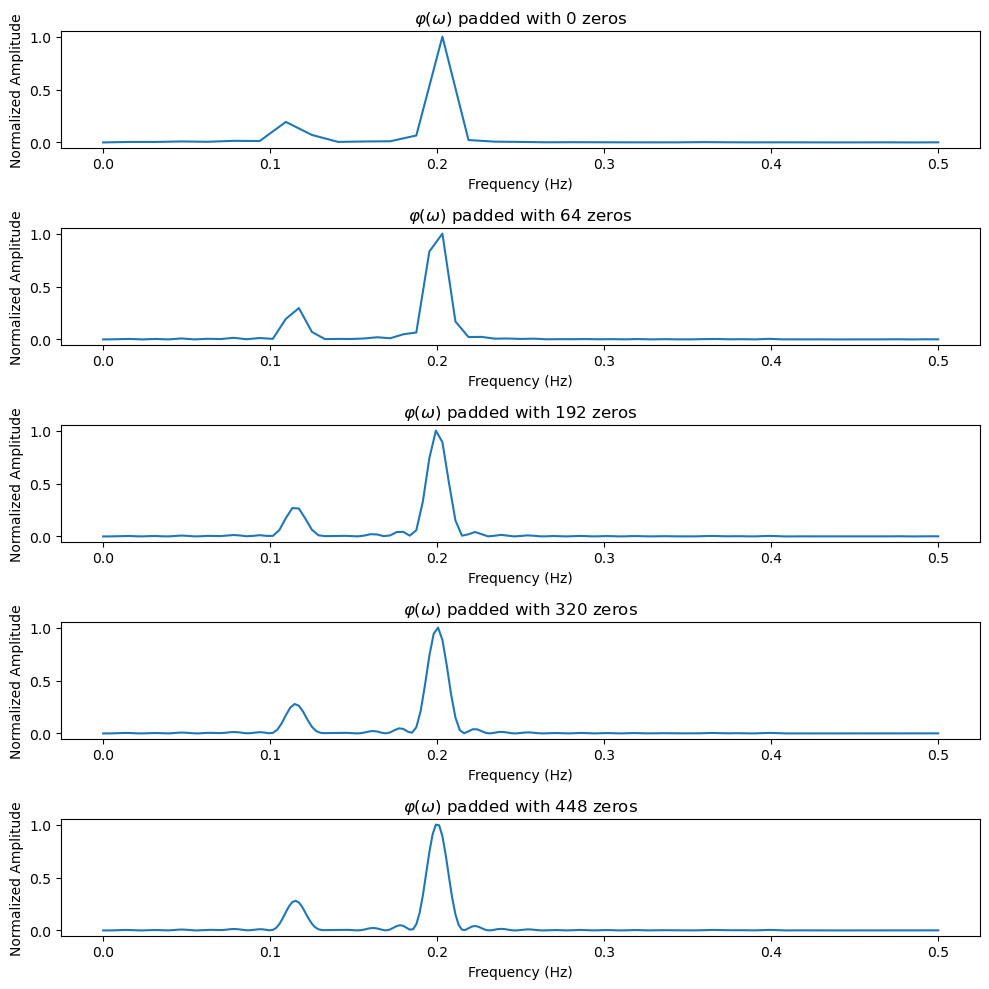

In [3]:
f1, phi1 = signal.periodogram(y0)
f2, phi2 = signal.periodogram(y0, nfft=2*N)
f3, phi3 = signal.periodogram(y0, nfft=4*N)
f4, phi4 = signal.periodogram(y0, nfft=6*N)
f5, phi5 = signal.periodogram(y0, nfft=8*N)
frequencies = [f1, f2, f3, f4, f5]
psds = [phi1/phi1.max(), phi2/phi2.max(), phi3/phi3.max(), phi4/phi4.max(), phi5/phi5.max()]
pads = [0, N, 3*N, 5*N, 7*N]

fig, ax = plt.subplots(5,1, figsize=(10,10))
for i, a in enumerate(ax.flatten()):
    a.plot(frequencies[i], psds[i])
    a.set_title("$\\varphi(\omega)$ padded with %i zeros" %pads[i])
    a.set_xlabel("Frequency (Hz)")
    a.set_ylabel("Normalized Amplitude")
fig.tight_layout()
plt.show()

Above are the 5 periodograms of the given function $y(t) = 10 \sin(0.2 · 2\pi t + \phi_1) + 5 \sin((0.2 + 1/N)2\pi t + \phi_2) + e(t)$.

Although the resolution is the same in all periodograms notice that the peak of the first one that is not zero padded is not at 0.2 where it should be. The padded periodograms smooth out the results making them easier to read and understand the spectral content of the signal.

The width of all the periodograms is the same and the maximum height is also the same. The main difference is that the smoother signals are easier to interpret.
